In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import time
# sklearn 관련
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
# xgboost 관련
from xgboost import XGBClassifier
from xgboost import plot_importance
# lightgbm 관련
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [2]:
cust_df = pd.read_csv('./train.csv',encoding='latin-1')
print(cust_df.shape)
cust_df.head(3)

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
cust_df['TARGET'].value_counts() # 0: 만족, 1: 불만족

0    73012
1     3008
Name: TARGET, dtype: int64

In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1, inplace=True)

# X랑 y 나누기
X = cust_df.iloc[:,:-1]
y = cust_df.iloc[:,-1]
X.shape

(76020, 369)

In [6]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(y_train.value_counts()/y_train.count())
print(y_eval.value_counts()/y_eval.count())

0    0.960964
1    0.039036
Name: TARGET, dtype: float64
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBoost 학습

In [7]:
tic = time.time() #시작 시간
#---------------------
# 학습
xgb = XGBClassifier(n_estimators = 500, random_state = 156)
xgb.fit(X_train, y_train, early_stopping_rounds = 100,
       eval_metric = "auc", eval_set = [(X_train, y_train), (X_eval, y_eval)])
xgb_roc_score = roc_auc_score(y_eval, xgb.predict_proba(X_eval)[:,1],average = 'macro')
#---------------------
toc = time.time() # 끝 시간

print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.8413
print('time elapsed:', toc - tic) #31초

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [9]:
tic = time.time()

#-------------------
# Grid Search
xgb = XGBClassifier(n_estimators = 100, random_state = 156)

# 하이퍼파라미터 후보
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}
# folds = 3
gridcv = GridSearchCV(xgb, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
          eval_set = [(X_train, y_train), (X_eval, y_eval)])
xgb_roc_score = roc_auc_score(y_eval, gridcv.predict_proba(X_eval)[:,1],average='macro')
#-------------------

toc = time.time()

print('Optimized hyperparameters', gridcv.best_params_) #{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.8433
print('time elapsed:', toc - tic) # 178초 = 3분

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.72896	validation_1-auc:0.73050
[1]	validation_0-auc:0.73632	validation_1-auc:0.73794
[2]	validation_0-auc:0.81490	validation_1-auc:0.81603
[3]	validation_0-auc:0.80956	validation_1-auc:0.81386
[4]	validation_0-auc:0.82381	validation_1-auc:0.82395
[5]	validation_0-auc:0.83257	validation_1-auc:0.83248
[6]	validation_0-auc:0.83887	validation_1-auc:0.83552
[7]	validation_0-auc:0.83347	validation_1-auc:0.83039
[8]	validation_0-auc:0.83982	validation_1-auc:0.83612
[9]	validation_0-auc:0.84348	validation_1-auc:0.83879
[10]	validation_0-auc:0.84680	validation_1-auc:0.83803
[11]	validation_0-auc:0.84791	validation_1-auc:0.83852
[12]	validation_0-auc:0.85135	validation_1-auc:0.83879
[13]	validation_0-auc:0.85286	validation_1-auc:0.83872
[14]	validation_0-auc:0.85483	validation_1-auc:0.83866
[15]	validation_0-auc:0.85691	validation_1-auc:0.83849
[16]	validation_0-auc:0.85812	validation_1-auc:0.83910
[17]	validation_0-auc:0.85886	validation_1-auc:0.83864
[18]	validation_0-au

[36]	validation_0-auc:0.87327	validation_1-auc:0.83905
[37]	validation_0-auc:0.87330	validation_1-auc:0.83885
[38]	validation_0-auc:0.87382	validation_1-auc:0.83850
[39]	validation_0-auc:0.87388	validation_1-auc:0.83857
[40]	validation_0-auc:0.87397	validation_1-auc:0.83851
[41]	validation_0-auc:0.87425	validation_1-auc:0.83890
[42]	validation_0-auc:0.87430	validation_1-auc:0.83881
[43]	validation_0-auc:0.87483	validation_1-auc:0.83889
[44]	validation_0-auc:0.87494	validation_1-auc:0.83878
[45]	validation_0-auc:0.87521	validation_1-auc:0.83859
[46]	validation_0-auc:0.87534	validation_1-auc:0.83876
[47]	validation_0-auc:0.87617	validation_1-auc:0.83840
[48]	validation_0-auc:0.87641	validation_1-auc:0.83842
[49]	validation_0-auc:0.87756	validation_1-auc:0.83848
[50]	validation_0-auc:0.87778	validation_1-auc:0.83823
[51]	validation_0-auc:0.87787	validation_1-auc:0.83838
[52]	validation_0-auc:0.87795	validation_1-auc:0.83827
[53]	validation_0-auc:0.87804	validation_1-auc:0.83801
[54]	valid

[28]	validation_0-auc:0.86713	validation_1-auc:0.83941
[29]	validation_0-auc:0.86737	validation_1-auc:0.83899
[30]	validation_0-auc:0.86798	validation_1-auc:0.83929
[31]	validation_0-auc:0.86805	validation_1-auc:0.83915
[32]	validation_0-auc:0.86825	validation_1-auc:0.83917
[33]	validation_0-auc:0.86873	validation_1-auc:0.83956
[34]	validation_0-auc:0.86924	validation_1-auc:0.83988
[35]	validation_0-auc:0.86991	validation_1-auc:0.83995
[36]	validation_0-auc:0.87005	validation_1-auc:0.84032
[37]	validation_0-auc:0.87027	validation_1-auc:0.84022
[38]	validation_0-auc:0.87067	validation_1-auc:0.84037
[39]	validation_0-auc:0.87120	validation_1-auc:0.84005
[40]	validation_0-auc:0.87131	validation_1-auc:0.83994
[41]	validation_0-auc:0.87151	validation_1-auc:0.83959
[42]	validation_0-auc:0.87170	validation_1-auc:0.83941
[43]	validation_0-auc:0.87184	validation_1-auc:0.83925
[44]	validation_0-auc:0.87197	validation_1-auc:0.83934
[45]	validation_0-auc:0.87225	validation_1-auc:0.83922
[46]	valid

[29]	validation_0-auc:0.88998	validation_1-auc:0.83927
[30]	validation_0-auc:0.89031	validation_1-auc:0.83944
[31]	validation_0-auc:0.89049	validation_1-auc:0.83986
[32]	validation_0-auc:0.89123	validation_1-auc:0.83970
[33]	validation_0-auc:0.89155	validation_1-auc:0.83925
[34]	validation_0-auc:0.89192	validation_1-auc:0.83911
[35]	validation_0-auc:0.89202	validation_1-auc:0.83886
[36]	validation_0-auc:0.89219	validation_1-auc:0.83899
[37]	validation_0-auc:0.89287	validation_1-auc:0.83853
[38]	validation_0-auc:0.89286	validation_1-auc:0.83852
[39]	validation_0-auc:0.89307	validation_1-auc:0.83824
[40]	validation_0-auc:0.89367	validation_1-auc:0.83720
[41]	validation_0-auc:0.89402	validation_1-auc:0.83682
[42]	validation_0-auc:0.89398	validation_1-auc:0.83652
[43]	validation_0-auc:0.89409	validation_1-auc:0.83657
[44]	validation_0-auc:0.89413	validation_1-auc:0.83647
[45]	validation_0-auc:0.89421	validation_1-auc:0.83624
[46]	validation_0-auc:0.89436	validation_1-auc:0.83594
[47]	valid

[28]	validation_0-auc:0.88401	validation_1-auc:0.84034
[29]	validation_0-auc:0.88415	validation_1-auc:0.84006
[30]	validation_0-auc:0.88451	validation_1-auc:0.83975
[31]	validation_0-auc:0.88520	validation_1-auc:0.83972
[32]	validation_0-auc:0.88561	validation_1-auc:0.83979
[33]	validation_0-auc:0.88578	validation_1-auc:0.83917
[34]	validation_0-auc:0.88585	validation_1-auc:0.83903
[35]	validation_0-auc:0.88589	validation_1-auc:0.83891
[36]	validation_0-auc:0.88597	validation_1-auc:0.83869
[37]	validation_0-auc:0.88636	validation_1-auc:0.83835
[38]	validation_0-auc:0.88629	validation_1-auc:0.83816
[39]	validation_0-auc:0.88674	validation_1-auc:0.83876
[40]	validation_0-auc:0.88697	validation_1-auc:0.83830
[41]	validation_0-auc:0.88712	validation_1-auc:0.83843
[42]	validation_0-auc:0.88716	validation_1-auc:0.83857
[43]	validation_0-auc:0.88736	validation_1-auc:0.83827
[44]	validation_0-auc:0.88766	validation_1-auc:0.83846
[45]	validation_0-auc:0.88784	validation_1-auc:0.83845
[46]	valid

[43]	validation_0-auc:0.87881	validation_1-auc:0.83887
[44]	validation_0-auc:0.87919	validation_1-auc:0.83907
[45]	validation_0-auc:0.88004	validation_1-auc:0.83915
[46]	validation_0-auc:0.88056	validation_1-auc:0.83950
[47]	validation_0-auc:0.88088	validation_1-auc:0.83899
[48]	validation_0-auc:0.88136	validation_1-auc:0.83893
[49]	validation_0-auc:0.88156	validation_1-auc:0.83887
[50]	validation_0-auc:0.88182	validation_1-auc:0.83845
[51]	validation_0-auc:0.88265	validation_1-auc:0.83774
[52]	validation_0-auc:0.88273	validation_1-auc:0.83774
[53]	validation_0-auc:0.88279	validation_1-auc:0.83777
[54]	validation_0-auc:0.88296	validation_1-auc:0.83806
[55]	validation_0-auc:0.88383	validation_1-auc:0.83768
[56]	validation_0-auc:0.88450	validation_1-auc:0.83754
[57]	validation_0-auc:0.88514	validation_1-auc:0.83713
[58]	validation_0-auc:0.88524	validation_1-auc:0.83693
[59]	validation_0-auc:0.88577	validation_1-auc:0.83666
[60]	validation_0-auc:0.88633	validation_1-auc:0.83665
[0]	valida

[39]	validation_0-auc:0.87368	validation_1-auc:0.83803
[40]	validation_0-auc:0.87392	validation_1-auc:0.83821
[41]	validation_0-auc:0.87437	validation_1-auc:0.83816
[42]	validation_0-auc:0.87498	validation_1-auc:0.83757
[43]	validation_0-auc:0.87516	validation_1-auc:0.83721
[44]	validation_0-auc:0.87569	validation_1-auc:0.83724
[45]	validation_0-auc:0.87591	validation_1-auc:0.83747
[46]	validation_0-auc:0.87658	validation_1-auc:0.83702
[47]	validation_0-auc:0.87701	validation_1-auc:0.83717
[48]	validation_0-auc:0.87754	validation_1-auc:0.83666
[0]	validation_0-auc:0.72096	validation_1-auc:0.72574
[1]	validation_0-auc:0.80974	validation_1-auc:0.80841
[2]	validation_0-auc:0.83356	validation_1-auc:0.82217
[3]	validation_0-auc:0.83876	validation_1-auc:0.82626
[4]	validation_0-auc:0.84452	validation_1-auc:0.83013
[5]	validation_0-auc:0.84878	validation_1-auc:0.83304
[6]	validation_0-auc:0.85244	validation_1-auc:0.83274
[7]	validation_0-auc:0.85348	validation_1-auc:0.83195
[8]	validation_0-a

[11]	validation_0-auc:0.86488	validation_1-auc:0.83741
[12]	validation_0-auc:0.86711	validation_1-auc:0.83648
[13]	validation_0-auc:0.86949	validation_1-auc:0.83682
[14]	validation_0-auc:0.87147	validation_1-auc:0.83586
[15]	validation_0-auc:0.87226	validation_1-auc:0.83452
[16]	validation_0-auc:0.87346	validation_1-auc:0.83493
[17]	validation_0-auc:0.87471	validation_1-auc:0.83545
[18]	validation_0-auc:0.87483	validation_1-auc:0.83462
[19]	validation_0-auc:0.87523	validation_1-auc:0.83449
[20]	validation_0-auc:0.87631	validation_1-auc:0.83415
[21]	validation_0-auc:0.87684	validation_1-auc:0.83394
[22]	validation_0-auc:0.87777	validation_1-auc:0.83434
[23]	validation_0-auc:0.87815	validation_1-auc:0.83441
[24]	validation_0-auc:0.87897	validation_1-auc:0.83500
[25]	validation_0-auc:0.87923	validation_1-auc:0.83433
[26]	validation_0-auc:0.87960	validation_1-auc:0.83342
[27]	validation_0-auc:0.88001	validation_1-auc:0.83303
[28]	validation_0-auc:0.88101	validation_1-auc:0.83389
[29]	valid

[29]	validation_0-auc:0.87589	validation_1-auc:0.84126
[30]	validation_0-auc:0.87719	validation_1-auc:0.84125
[31]	validation_0-auc:0.87749	validation_1-auc:0.84106
[32]	validation_0-auc:0.87774	validation_1-auc:0.84097
[33]	validation_0-auc:0.87865	validation_1-auc:0.84137
[34]	validation_0-auc:0.87919	validation_1-auc:0.84130
[35]	validation_0-auc:0.87960	validation_1-auc:0.84106
[36]	validation_0-auc:0.88035	validation_1-auc:0.84136
[37]	validation_0-auc:0.88071	validation_1-auc:0.84136
[38]	validation_0-auc:0.88114	validation_1-auc:0.84105
[39]	validation_0-auc:0.88211	validation_1-auc:0.84097
[40]	validation_0-auc:0.88248	validation_1-auc:0.84096
[41]	validation_0-auc:0.88319	validation_1-auc:0.84042
[42]	validation_0-auc:0.88347	validation_1-auc:0.84034
Optimized hyperparameters {'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC: 0.8433
time elapsed: 178.41108393669128


In [13]:
tic = time.time()

xgb = XGBClassifier(colsample_bytree = 0.75, max_depth = 5, min_child_weight = 3, n_estimators = 1000,
                   random_state = 156, learning_rate = 0.02, reg_alpha = 0.03) # 위의 최적 파라미터 결과

xgb.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = "auc",
       eval_set = [(X_train, y_train), (X_eval, y_eval)])

xgb_roc_score = roc_auc_score(y_eval, xgb.predict_proba(X_eval)[:,1],average='macro')

toc = time.time()

print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) # 0.8450
print('time elapsed:', toc - tic) # 77초

[0]	validation_0-auc:0.74240	validation_1-auc:0.74545
[1]	validation_0-auc:0.80004	validation_1-auc:0.80339
[2]	validation_0-auc:0.82087	validation_1-auc:0.81748
[3]	validation_0-auc:0.82509	validation_1-auc:0.81943
[4]	validation_0-auc:0.82790	validation_1-auc:0.82095
[5]	validation_0-auc:0.82849	validation_1-auc:0.82097
[6]	validation_0-auc:0.82828	validation_1-auc:0.82058
[7]	validation_0-auc:0.82725	validation_1-auc:0.82081
[8]	validation_0-auc:0.82805	validation_1-auc:0.82150
[9]	validation_0-auc:0.83006	validation_1-auc:0.82315
[10]	validation_0-auc:0.83005	validation_1-auc:0.82327
[11]	validation_0-auc:0.82997	validation_1-auc:0.82291
[12]	validation_0-auc:0.83097	validation_1-auc:0.82413
[13]	validation_0-auc:0.83150	validation_1-auc:0.82453
[14]	validation_0-auc:0.83137	validation_1-auc:0.82462
[15]	validation_0-auc:0.83066	validation_1-auc:0.82370
[16]	validation_0-auc:0.83127	validation_1-auc:0.82430
[17]	validation_0-auc:0.83485	validation_1-auc:0.82916
[18]	validation_0-au

[149]	validation_0-auc:0.85664	validation_1-auc:0.84226
[150]	validation_0-auc:0.85665	validation_1-auc:0.84220
[151]	validation_0-auc:0.85668	validation_1-auc:0.84226
[152]	validation_0-auc:0.85686	validation_1-auc:0.84235
[153]	validation_0-auc:0.85707	validation_1-auc:0.84244
[154]	validation_0-auc:0.85719	validation_1-auc:0.84250
[155]	validation_0-auc:0.85738	validation_1-auc:0.84264
[156]	validation_0-auc:0.85748	validation_1-auc:0.84272
[157]	validation_0-auc:0.85755	validation_1-auc:0.84287
[158]	validation_0-auc:0.85772	validation_1-auc:0.84303
[159]	validation_0-auc:0.85778	validation_1-auc:0.84306
[160]	validation_0-auc:0.85784	validation_1-auc:0.84311
[161]	validation_0-auc:0.85800	validation_1-auc:0.84347
[162]	validation_0-auc:0.85807	validation_1-auc:0.84314
[163]	validation_0-auc:0.85821	validation_1-auc:0.84311
[164]	validation_0-auc:0.85837	validation_1-auc:0.84319
[165]	validation_0-auc:0.85847	validation_1-auc:0.84314
[166]	validation_0-auc:0.85858	validation_1-auc:

[296]	validation_0-auc:0.87123	validation_1-auc:0.84403
[297]	validation_0-auc:0.87128	validation_1-auc:0.84408
[298]	validation_0-auc:0.87133	validation_1-auc:0.84407
[299]	validation_0-auc:0.87135	validation_1-auc:0.84409
[300]	validation_0-auc:0.87143	validation_1-auc:0.84410
[301]	validation_0-auc:0.87154	validation_1-auc:0.84412
[302]	validation_0-auc:0.87161	validation_1-auc:0.84411
[303]	validation_0-auc:0.87162	validation_1-auc:0.84414
[304]	validation_0-auc:0.87172	validation_1-auc:0.84420
[305]	validation_0-auc:0.87183	validation_1-auc:0.84418
[306]	validation_0-auc:0.87189	validation_1-auc:0.84417
[307]	validation_0-auc:0.87196	validation_1-auc:0.84418
[308]	validation_0-auc:0.87205	validation_1-auc:0.84413
[309]	validation_0-auc:0.87209	validation_1-auc:0.84414
[310]	validation_0-auc:0.87216	validation_1-auc:0.84416
[311]	validation_0-auc:0.87220	validation_1-auc:0.84412
[312]	validation_0-auc:0.87232	validation_1-auc:0.84412
[313]	validation_0-auc:0.87237	validation_1-auc:

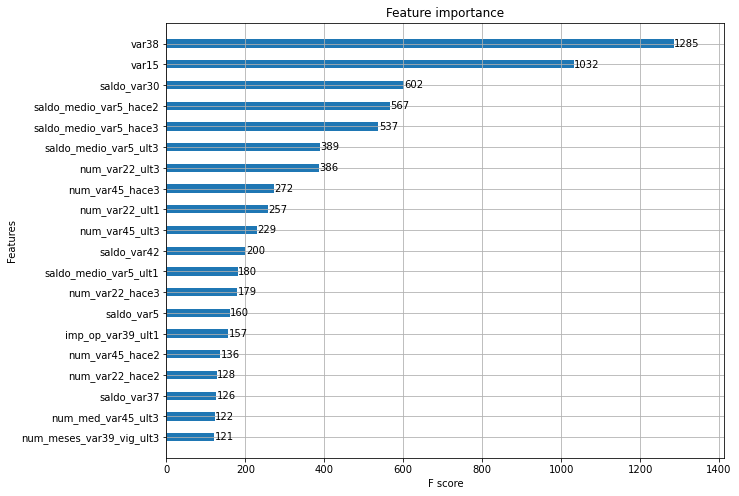

In [15]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax, max_num_features = 20, height=.4)

## LightGBM 학습

In [18]:
tic = time.time()
lgbm = LGBMClassifier (n_estimators = 500, random_state = 156)

lgbm.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "auc", 
         eval_set = [(X_train, y_train), (X_eval, y_eval)])

lgbm_roc_score = roc_auc_score (y_eval, lgbm.predict_proba(X_eval)[:,1], average="macro")
toc = time.time()


print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) # 0.8409
print('time elapsed:', toc - tic) # 1.8초!

[1]	training's auc: 0.823612	training's binary_logloss: 0.156016	valid_1's auc: 0.817384	valid_1's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.827661	training's binary_logloss: 0.150579	valid_1's auc: 0.818903	valid_1's binary_logloss: 0.160006
[3]	training's auc: 0.837671	training's binary_logloss: 0.146617	valid_1's auc: 0.827707	valid_1's binary_logloss: 0.156323
[4]	training's auc: 0.843171	training's binary_logloss: 0.143452	valid_1's auc: 0.832155	valid_1's binary_logloss: 0.153463
[5]	training's auc: 0.845828	training's binary_logloss: 0.140934	valid_1's auc: 0.834677	valid_1's binary_logloss: 0.151256
[6]	training's auc: 0.846531	training's binary_logloss: 0.138851	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.149427
[7]	training's auc: 0.850239	training's binary_logloss: 0.136968	valid_1's auc: 0.837046	valid_1's binary_logloss: 0.147961
[8]	training's auc: 0.852495	training's binary_logloss: 0.135451	valid

[79]	training's auc: 0.915934	training's binary_logloss: 0.1092	valid_1's auc: 0.837541	valid_1's binary_logloss: 0.139944
[80]	training's auc: 0.916607	training's binary_logloss: 0.108946	valid_1's auc: 0.838013	valid_1's binary_logloss: 0.13983
[81]	training's auc: 0.916807	training's binary_logloss: 0.108795	valid_1's auc: 0.83789	valid_1's binary_logloss: 0.139874
[82]	training's auc: 0.917234	training's binary_logloss: 0.108586	valid_1's auc: 0.837671	valid_1's binary_logloss: 0.139975
[83]	training's auc: 0.917623	training's binary_logloss: 0.108407	valid_1's auc: 0.837707	valid_1's binary_logloss: 0.139972
[84]	training's auc: 0.917831	training's binary_logloss: 0.108237	valid_1's auc: 0.837631	valid_1's binary_logloss: 0.140011
[85]	training's auc: 0.918049	training's binary_logloss: 0.10813	valid_1's auc: 0.837496	valid_1's binary_logloss: 0.140023
[86]	training's auc: 0.918313	training's binary_logloss: 0.107976	valid_1's auc: 0.83757	valid_1's binary_logloss: 0.140021
[87]	t

In [20]:
tic = time.time()

params = {
    'max_depth':[128,160],
    'min_child_samples':[60,100],
    'subsample':[0.8,1]
}
lgbm = LGBMClassifier(n_estimator = 100, random_state = 156)

gridcv = GridSearchCV(lgbm, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc',
          eval_set = [(X_train, y_train), (X_eval, y_eval)])

lgbm_roc_score = roc_auc_score(y_eval, gridcv.predict_proba(X_eval)[:,1],average='macro')

toc = time.time()

print('Optimized hyperparameters', gridcv.best_params_) # {'max_depth': 128, 'min_child_samples': 60, 'subsample': 0.8}
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) # 0.8406
print('time elapsed:', toc - tic) # 46초

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572

[30]	valid_0's auc: 0.873218	valid_0's binary_logloss: 0.124234	valid_1's auc: 0.838048	valid_1's binary_logloss: 0.139769
[31]	valid_0's auc: 0.874055	valid_0's binary_logloss: 0.123993	valid_1's auc: 0.838765	valid_1's binary_logloss: 0.139667
[32]	valid_0's auc: 0.875053	valid_0's binary_logloss: 0.123708	valid_1's auc: 0.838331	valid_1's binary_logloss: 0.139647
[33]	valid_0's auc: 0.875971	valid_0's binary_logloss: 0.123442	valid_1's auc: 0.838327	valid_1's binary_logloss: 0.139633
[34]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.123236	valid_1's auc: 0.838115	valid_1's binary_logloss: 0.139649
[35]	valid_0's auc: 0.877367	valid_0's binary_logloss: 0.122967	valid_1's auc: 0.838011	valid_1's binary_logloss: 0.13965
[36]	valid_0's auc: 0.878121	valid_0's binary_logloss: 0.122753	valid_1's auc: 0.838001	valid_1's binary_logloss: 0.139639
[37]	valid_0's auc: 0.878717	valid_0's binary_logloss: 0.122569	valid_1's auc: 0.837691	valid_1's binary_logloss: 0.139684
[38]	valid_0's au

[53]	valid_0's auc: 0.885611	valid_0's binary_logloss: 0.119629	valid_1's auc: 0.840494	valid_1's binary_logloss: 0.139083
[54]	valid_0's auc: 0.885974	valid_0's binary_logloss: 0.119456	valid_1's auc: 0.840452	valid_1's binary_logloss: 0.139091
[55]	valid_0's auc: 0.886254	valid_0's binary_logloss: 0.119289	valid_1's auc: 0.84039	valid_1's binary_logloss: 0.13913
[56]	valid_0's auc: 0.886809	valid_0's binary_logloss: 0.119127	valid_1's auc: 0.840006	valid_1's binary_logloss: 0.139198
[57]	valid_0's auc: 0.887105	valid_0's binary_logloss: 0.118974	valid_1's auc: 0.840074	valid_1's binary_logloss: 0.13919
[58]	valid_0's auc: 0.887527	valid_0's binary_logloss: 0.118808	valid_1's auc: 0.839819	valid_1's binary_logloss: 0.139243
[59]	valid_0's auc: 0.887868	valid_0's binary_logloss: 0.118688	valid_1's auc: 0.83958	valid_1's binary_logloss: 0.139293
[60]	valid_0's auc: 0.88804	valid_0's binary_logloss: 0.118571	valid_1's auc: 0.839759	valid_1's binary_logloss: 0.139268
[61]	valid_0's auc: 0

[30]	valid_0's auc: 0.873218	valid_0's binary_logloss: 0.124234	valid_1's auc: 0.838048	valid_1's binary_logloss: 0.139769
[31]	valid_0's auc: 0.874055	valid_0's binary_logloss: 0.123993	valid_1's auc: 0.838765	valid_1's binary_logloss: 0.139667
[32]	valid_0's auc: 0.875053	valid_0's binary_logloss: 0.123708	valid_1's auc: 0.838331	valid_1's binary_logloss: 0.139647
[33]	valid_0's auc: 0.875971	valid_0's binary_logloss: 0.123442	valid_1's auc: 0.838327	valid_1's binary_logloss: 0.139633
[34]	valid_0's auc: 0.876486	valid_0's binary_logloss: 0.123236	valid_1's auc: 0.838115	valid_1's binary_logloss: 0.139649
[35]	valid_0's auc: 0.877367	valid_0's binary_logloss: 0.122967	valid_1's auc: 0.838011	valid_1's binary_logloss: 0.13965
[36]	valid_0's auc: 0.878121	valid_0's binary_logloss: 0.122753	valid_1's auc: 0.838001	valid_1's binary_logloss: 0.139639
[37]	valid_0's auc: 0.878717	valid_0's binary_logloss: 0.122569	valid_1's auc: 0.837691	valid_1's binary_logloss: 0.139684
[38]	valid_0's au

[39]	valid_0's auc: 0.879758	valid_0's binary_logloss: 0.122171	valid_1's auc: 0.840431	valid_1's binary_logloss: 0.138979
[40]	valid_0's auc: 0.880176	valid_0's binary_logloss: 0.121944	valid_1's auc: 0.840473	valid_1's binary_logloss: 0.138951
[41]	valid_0's auc: 0.880826	valid_0's binary_logloss: 0.121711	valid_1's auc: 0.840646	valid_1's binary_logloss: 0.138913
[42]	valid_0's auc: 0.881237	valid_0's binary_logloss: 0.12153	valid_1's auc: 0.840775	valid_1's binary_logloss: 0.138898
[43]	valid_0's auc: 0.881488	valid_0's binary_logloss: 0.121353	valid_1's auc: 0.840542	valid_1's binary_logloss: 0.138973
[44]	valid_0's auc: 0.88217	valid_0's binary_logloss: 0.121153	valid_1's auc: 0.84025	valid_1's binary_logloss: 0.139024
[45]	valid_0's auc: 0.882502	valid_0's binary_logloss: 0.120969	valid_1's auc: 0.840617	valid_1's binary_logloss: 0.138952
[46]	valid_0's auc: 0.882901	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.840635	valid_1's binary_logloss: 0.138929
[47]	valid_0's auc:

[31]	valid_0's auc: 0.870865	valid_0's binary_logloss: 0.125335	valid_1's auc: 0.834156	valid_1's binary_logloss: 0.140192
[32]	valid_0's auc: 0.871658	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.834296	valid_1's binary_logloss: 0.140153
[33]	valid_0's auc: 0.872212	valid_0's binary_logloss: 0.124868	valid_1's auc: 0.834498	valid_1's binary_logloss: 0.140108
[34]	valid_0's auc: 0.872847	valid_0's binary_logloss: 0.124636	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.140111
[35]	valid_0's auc: 0.87329	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.834434	valid_1's binary_logloss: 0.140147
[36]	valid_0's auc: 0.873822	valid_0's binary_logloss: 0.124217	valid_1's auc: 0.834986	valid_1's binary_logloss: 0.140022
[37]	valid_0's auc: 0.874383	valid_0's binary_logloss: 0.124005	valid_1's auc: 0.834655	valid_1's binary_logloss: 0.140049
[38]	valid_0's auc: 0.875474	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834606	valid_1's binary_logloss: 0.140054
[39]	valid_0's auc

[31]	valid_0's auc: 0.872937	valid_0's binary_logloss: 0.124951	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.139876
[32]	valid_0's auc: 0.873874	valid_0's binary_logloss: 0.124701	valid_1's auc: 0.837744	valid_1's binary_logloss: 0.139829
[33]	valid_0's auc: 0.87455	valid_0's binary_logloss: 0.124451	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.139747
[34]	valid_0's auc: 0.875025	valid_0's binary_logloss: 0.124232	valid_1's auc: 0.838116	valid_1's binary_logloss: 0.139701
[35]	valid_0's auc: 0.875739	valid_0's binary_logloss: 0.123987	valid_1's auc: 0.838175	valid_1's binary_logloss: 0.139678
[36]	valid_0's auc: 0.876172	valid_0's binary_logloss: 0.123802	valid_1's auc: 0.838206	valid_1's binary_logloss: 0.139653
[37]	valid_0's auc: 0.876758	valid_0's binary_logloss: 0.123558	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.139636
[38]	valid_0's auc: 0.877313	valid_0's binary_logloss: 0.123322	valid_1's auc: 0.838054	valid_1's binary_logloss: 0.139633
[39]	valid_0's au

[29]	valid_0's auc: 0.869004	valid_0's binary_logloss: 0.125852	valid_1's auc: 0.83427	valid_1's binary_logloss: 0.14028
[30]	valid_0's auc: 0.870112	valid_0's binary_logloss: 0.125566	valid_1's auc: 0.834659	valid_1's binary_logloss: 0.140164
[31]	valid_0's auc: 0.870865	valid_0's binary_logloss: 0.125335	valid_1's auc: 0.834156	valid_1's binary_logloss: 0.140192
[32]	valid_0's auc: 0.871658	valid_0's binary_logloss: 0.12506	valid_1's auc: 0.834296	valid_1's binary_logloss: 0.140153
[33]	valid_0's auc: 0.872212	valid_0's binary_logloss: 0.124868	valid_1's auc: 0.834498	valid_1's binary_logloss: 0.140108
[34]	valid_0's auc: 0.872847	valid_0's binary_logloss: 0.124636	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.140111
[35]	valid_0's auc: 0.87329	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.834434	valid_1's binary_logloss: 0.140147
[36]	valid_0's auc: 0.873822	valid_0's binary_logloss: 0.124217	valid_1's auc: 0.834986	valid_1's binary_logloss: 0.140022
[37]	valid_0's auc: 

[31]	valid_0's auc: 0.872937	valid_0's binary_logloss: 0.124951	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.139876
[32]	valid_0's auc: 0.873874	valid_0's binary_logloss: 0.124701	valid_1's auc: 0.837744	valid_1's binary_logloss: 0.139829
[33]	valid_0's auc: 0.87455	valid_0's binary_logloss: 0.124451	valid_1's auc: 0.837836	valid_1's binary_logloss: 0.139747
[34]	valid_0's auc: 0.875025	valid_0's binary_logloss: 0.124232	valid_1's auc: 0.838116	valid_1's binary_logloss: 0.139701
[35]	valid_0's auc: 0.875739	valid_0's binary_logloss: 0.123987	valid_1's auc: 0.838175	valid_1's binary_logloss: 0.139678
[36]	valid_0's auc: 0.876172	valid_0's binary_logloss: 0.123802	valid_1's auc: 0.838206	valid_1's binary_logloss: 0.139653
[37]	valid_0's auc: 0.876758	valid_0's binary_logloss: 0.123558	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.139636
[38]	valid_0's auc: 0.877313	valid_0's binary_logloss: 0.123322	valid_1's auc: 0.838054	valid_1's binary_logloss: 0.139633
[39]	valid_0's au

[29]	valid_0's auc: 0.870626	valid_0's binary_logloss: 0.125179	valid_1's auc: 0.832988	valid_1's binary_logloss: 0.140541
[30]	valid_0's auc: 0.871435	valid_0's binary_logloss: 0.124909	valid_1's auc: 0.832737	valid_1's binary_logloss: 0.140561
[31]	valid_0's auc: 0.871973	valid_0's binary_logloss: 0.124687	valid_1's auc: 0.832443	valid_1's binary_logloss: 0.14056
[32]	valid_0's auc: 0.873281	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.833085	valid_1's binary_logloss: 0.140444
[33]	valid_0's auc: 0.873981	valid_0's binary_logloss: 0.124124	valid_1's auc: 0.832656	valid_1's binary_logloss: 0.140483
[34]	valid_0's auc: 0.874432	valid_0's binary_logloss: 0.123884	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140445
[35]	valid_0's auc: 0.874851	valid_0's binary_logloss: 0.123652	valid_1's auc: 0.832795	valid_1's binary_logloss: 0.140444
[36]	valid_0's auc: 0.875353	valid_0's binary_logloss: 0.123466	valid_1's auc: 0.833217	valid_1's binary_logloss: 0.140387
[37]	valid_0's au

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's auc: 0.82166	valid_0's binary_logloss: 0.156555	valid_1's auc: 0.818884	valid_1's binary_logloss: 0.165074
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.8275	valid_0's binary_logloss: 0.151228	valid_1's auc: 0.822224	valid_1's binary_logloss: 0.160016
[3]	valid_0's auc: 0.837962	valid_0's binary_logloss: 0.147321	valid_1's auc: 0.82992	valid_1's binary_logloss: 0.156365
[4]	valid_0's auc: 0.840164	valid_0's binary_logloss: 0.144323	valid_1's auc: 0.832446	valid_1's binary_logloss: 0.153425
[5]	valid_0's auc: 0.84235	valid_0's binary_logloss: 0.141872	valid_1's auc: 0.834635	valid_1's binary_logloss: 0.151099
[6]	valid_0's auc: 0.843803	valid_0's binary_logloss: 0.139812	valid_1's auc: 0.834578	valid_1's binary_logloss: 0.149292
[7]	valid_0's auc: 0.845663	va

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's auc: 0.820107	valid_0's binary_logloss: 0.156116	valid_1's auc: 0.815632	valid_1's binary_logloss: 0.165023
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825543	valid_0's binary_logloss: 0.151001	valid_1's auc: 0.821373	valid_1's binary_logloss: 0.159945
[3]	valid_0's auc: 0.832117	valid_0's binary_logloss: 0.147249	valid_1's auc: 0.826189	valid_1's binary_logloss: 0.156372
[4]	valid_0's auc: 0.837249	valid_0's binary_logloss: 0.144258	valid_1's auc: 0.83307	valid_1's binary_logloss: 0.153399
[5]	valid_0's auc: 0.841358	valid_0's binary_logloss: 0.141884	valid_1's auc: 0.836863	valid_1's binary_logloss: 0.151079
[6]	valid_0's auc: 0.843532	valid_0's binary_logloss: 0.139902	valid_1's auc: 0.83696	valid_1's binary_logloss: 0.149223
[7]	valid_0's auc: 0.845572

[41]	valid_0's auc: 0.880853	valid_0's binary_logloss: 0.121621	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.139894
[42]	valid_0's auc: 0.881552	valid_0's binary_logloss: 0.121421	valid_1's auc: 0.836972	valid_1's binary_logloss: 0.139875
[43]	valid_0's auc: 0.882038	valid_0's binary_logloss: 0.121215	valid_1's auc: 0.836762	valid_1's binary_logloss: 0.139957
[44]	valid_0's auc: 0.88248	valid_0's binary_logloss: 0.120992	valid_1's auc: 0.836839	valid_1's binary_logloss: 0.139972
[45]	valid_0's auc: 0.88331	valid_0's binary_logloss: 0.120742	valid_1's auc: 0.836717	valid_1's binary_logloss: 0.139965
[46]	valid_0's auc: 0.883667	valid_0's binary_logloss: 0.120551	valid_1's auc: 0.836576	valid_1's binary_logloss: 0.140004
[47]	valid_0's auc: 0.88403	valid_0's binary_logloss: 0.120429	valid_1's auc: 0.836598	valid_1's binary_logloss: 0.139972
[48]	valid_0's auc: 0.8844	valid_0's binary_logloss: 0.120233	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.140009
[49]	valid_0's auc: 0

[59]	valid_0's auc: 0.887868	valid_0's binary_logloss: 0.118688	valid_1's auc: 0.83958	valid_1's binary_logloss: 0.139293
[60]	valid_0's auc: 0.88804	valid_0's binary_logloss: 0.118571	valid_1's auc: 0.839759	valid_1's binary_logloss: 0.139268
[61]	valid_0's auc: 0.88872	valid_0's binary_logloss: 0.118362	valid_1's auc: 0.839499	valid_1's binary_logloss: 0.13932
[62]	valid_0's auc: 0.889104	valid_0's binary_logloss: 0.1182	valid_1's auc: 0.839538	valid_1's binary_logloss: 0.139294
[63]	valid_0's auc: 0.889242	valid_0's binary_logloss: 0.118112	valid_1's auc: 0.83958	valid_1's binary_logloss: 0.139292
[64]	valid_0's auc: 0.889497	valid_0's binary_logloss: 0.117983	valid_1's auc: 0.839625	valid_1's binary_logloss: 0.139293
[65]	valid_0's auc: 0.889686	valid_0's binary_logloss: 0.11788	valid_1's auc: 0.83966	valid_1's binary_logloss: 0.1393
[66]	valid_0's auc: 0.889878	valid_0's binary_logloss: 0.117756	valid_1's auc: 0.839565	valid_1's binary_logloss: 0.139349
[67]	valid_0's auc: 0.89039

[30]	valid_0's auc: 0.870941	valid_0's binary_logloss: 0.125323	valid_1's auc: 0.836407	valid_1's binary_logloss: 0.139532
[31]	valid_0's auc: 0.87123	valid_0's binary_logloss: 0.125132	valid_1's auc: 0.836019	valid_1's binary_logloss: 0.139575
[32]	valid_0's auc: 0.872038	valid_0's binary_logloss: 0.124898	valid_1's auc: 0.836243	valid_1's binary_logloss: 0.139503
[33]	valid_0's auc: 0.87259	valid_0's binary_logloss: 0.124662	valid_1's auc: 0.836362	valid_1's binary_logloss: 0.139505
[34]	valid_0's auc: 0.873319	valid_0's binary_logloss: 0.12441	valid_1's auc: 0.836517	valid_1's binary_logloss: 0.139489
[35]	valid_0's auc: 0.874206	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.836438	valid_1's binary_logloss: 0.139515
[36]	valid_0's auc: 0.874905	valid_0's binary_logloss: 0.123946	valid_1's auc: 0.836563	valid_1's binary_logloss: 0.139513
[37]	valid_0's auc: 0.87534	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.836635	valid_1's binary_logloss: 0.139512
Early stopping, best

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's auc: 0.824771	valid_0's binary_logloss: 0.156249	valid_1's auc: 0.817793	valid_1's binary_logloss: 0.165102
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828535	valid_0's binary_logloss: 0.151281	valid_1's auc: 0.823189	valid_1's binary_logloss: 0.160178
[3]	valid_0's auc: 0.835411	valid_0's binary_logloss: 0.147483	valid_1's auc: 0.828532	valid_1's binary_logloss: 0.15649
[4]	valid_0's auc: 0.839239	valid_0's binary_logloss: 0.144503	valid_1's auc: 0.832454	valid_1's binary_logloss: 0.153535
[5]	valid_0's auc: 0.842214	valid_0's binary_logloss: 0.142121	valid_1's auc: 0.834304	valid_1's binary_logloss: 0.151216
[6]	valid_0's auc: 0.845112	valid_0's binary_logloss: 0.14023	valid_1's auc: 0.833606	valid_1's binary_logloss: 0.149478
[7]	valid_0's auc: 0.846839

[32]	valid_0's auc: 0.872038	valid_0's binary_logloss: 0.124898	valid_1's auc: 0.836243	valid_1's binary_logloss: 0.139503
[33]	valid_0's auc: 0.87259	valid_0's binary_logloss: 0.124662	valid_1's auc: 0.836362	valid_1's binary_logloss: 0.139505
[34]	valid_0's auc: 0.873319	valid_0's binary_logloss: 0.12441	valid_1's auc: 0.836517	valid_1's binary_logloss: 0.139489
[35]	valid_0's auc: 0.874206	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.836438	valid_1's binary_logloss: 0.139515
[36]	valid_0's auc: 0.874905	valid_0's binary_logloss: 0.123946	valid_1's auc: 0.836563	valid_1's binary_logloss: 0.139513
[37]	valid_0's auc: 0.87534	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.836635	valid_1's binary_logloss: 0.139512
Early stopping, best iteration is:
[7]	valid_0's auc: 0.848479	valid_0's binary_logloss: 0.13838	valid_1's auc: 0.840063	valid_1's binary_logloss: 0.147378
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	training's auc: 0.823544	training's binary_logloss: 0.156167	valid_1's auc: 0.81662	valid_1's binary_logloss: 0.165164
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.827956	training's binary_logloss: 0.150935	valid_1's auc: 0.819528	valid_1's binary_logloss: 0.160021
[3]	training's auc: 0.837575	training's binary_logloss: 0.147071	valid_1's auc: 0.827643	valid_1's binary_logloss: 0.156404
[4]	training's auc: 0.843112	training's binary_logloss: 0.144068	valid_1's auc: 0.833009	valid_1's binary_logloss: 0.153515
[5]	training's auc: 0.845906	training's binary_logloss: 0.141647	valid_1's auc: 0.835136	valid_1's binary_logloss: 0.151349
[6]	training's auc: 0.84835	training's binary_logloss: 0.139572	valid_1's auc: 0.836927	valid_1's binary_logloss: 0.149462
[7]	training's 

In [22]:
x

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	training's auc: 0.823544	training's binary_logloss: 0.156167	valid_1's auc: 0.81662	valid_1's binary_logloss: 0.165164
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.827956	training's binary_logloss: 0.150935	valid_1's auc: 0.819528	valid_1's binary_logloss: 0.160021
[3]	training's auc: 0.837575	training's binary_logloss: 0.147071	valid_1's auc: 0.827643	valid_1's binary_logloss: 0.156404
[4]	training's auc: 0.843112	training's binary_logloss: 0.144068	valid_1's auc: 0.833009	valid_1's binary_logloss: 0.153515
[5]	training's auc: 0.845906	training's binary_logloss: 0.141647	valid_1's auc: 0.835136	valid_1's binary_logloss: 0.151349
[6]	training's auc: 0.84835	training's binary_logloss: 0.139572	valid_1's auc: 0.836927	valid_1's binary_logloss: 0.149462
[7]	training's auc: 0.851387	training's binary_logloss: 0.137804	v

[78]	training's auc: 0.910734	training's binary_logloss: 0.112028	valid_1's auc: 0.838648	valid_1's binary_logloss: 0.139393
[79]	training's auc: 0.911121	training's binary_logloss: 0.111839	valid_1's auc: 0.83863	valid_1's binary_logloss: 0.139397
[80]	training's auc: 0.911449	training's binary_logloss: 0.111669	valid_1's auc: 0.838413	valid_1's binary_logloss: 0.139432
[81]	training's auc: 0.911957	training's binary_logloss: 0.111529	valid_1's auc: 0.838481	valid_1's binary_logloss: 0.139434
[82]	training's auc: 0.912119	training's binary_logloss: 0.111421	valid_1's auc: 0.838467	valid_1's binary_logloss: 0.139437
[83]	training's auc: 0.912563	training's binary_logloss: 0.111221	valid_1's auc: 0.838361	valid_1's binary_logloss: 0.139442
[84]	training's auc: 0.913046	training's binary_logloss: 0.111013	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139507
[85]	training's auc: 0.913504	training's binary_logloss: 0.110851	valid_1's auc: 0.838264	valid_1's binary_logloss: 0.139496
[